In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math
import csv
import pandas as pd

In [2]:
GUNN = "Gunn"
FEASE = "FleschEase"
FGRADE = "FleschGrade"
KEY = "Key"

In [3]:
def file_to_dict(filename):
    with open(filename, 'r') as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            j = json.loads(line[1])
            if math.isnan(j[GUNN]):
                continue
            if math.isnan(j[FEASE]):
                continue
            if math.isnan(j[FGRADE]):
                continue
            yield json.loads(line[1])

In [4]:
filename = "../data/rare_pups.dat"
subs = list(file_to_dict(filename))
subs = pd.DataFrame(subs)


In [5]:
f_ease = subs[FEASE]
f_grade = subs[FGRADE]
gunn = subs[GUNN]

In [18]:
mini = np.math.floor(min((f_ease.min(),f_grade.min(), gunn.min())))
maxi = np.math.ceil(max((f_ease.max(), f_grade.max(), gunn.max())))
binning=np.arange(-10, 150, 2.0)

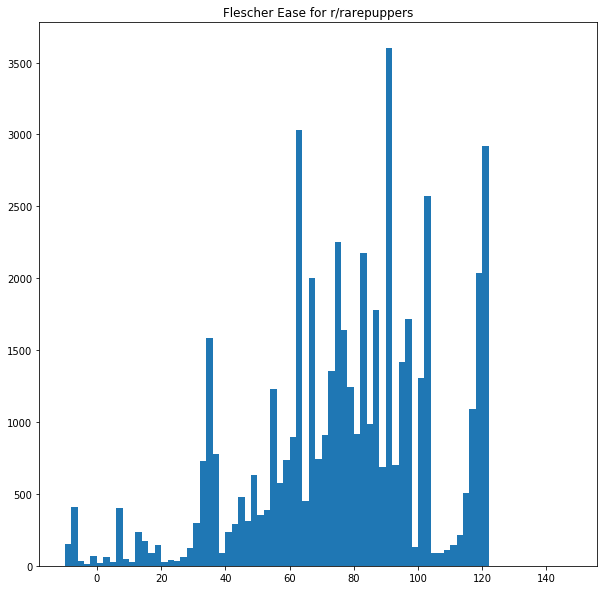

In [19]:
plt.figure(figsize=(10, 10))
plt.hist(f_ease, bins=binning)
plt.title("Flescher Ease for r/rarepuppers")
plt.show()

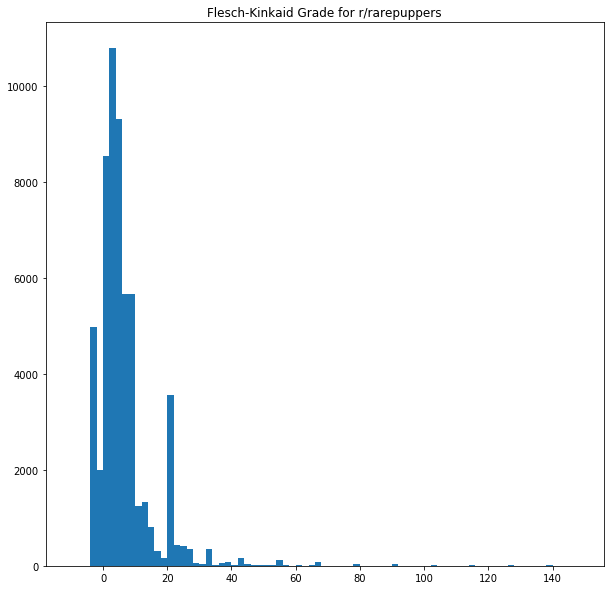

In [20]:
plt.figure(figsize=(10, 10))
plt.title("Flesch-Kinkaid Grade for r/rarepuppers")
plt.hist(f_grade, bins=binning)
plt.show()

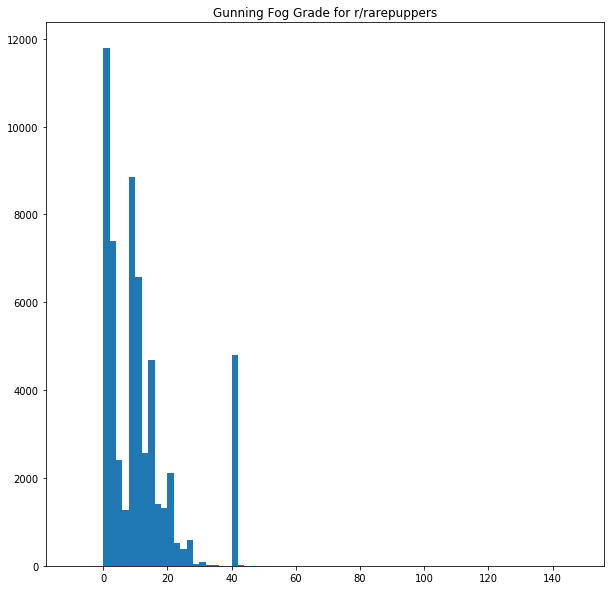

In [21]:
plt.figure(figsize=(10, 10))
plt.title("Gunning Fog Grade for r/rarepuppers")
plt.hist(gunn, bins=binning)
plt.show()